In [6]:
# from keras.models import Sequential
# from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
import pandas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# the dataset is too larage please download from 'https://www.kaggle.com/wendykan/lending-club-loan-data'
DF = pandas.read_csv('../loan.csv')
# drop entire null columns
DF = LoanDF.dropna(axis=1,how='all')
DF.head(5)

C:\Users\Wade\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [8]:
DF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


## Choose the needed columns

In [10]:
# Select the columns we need
column_needed = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'term', 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'addr_state', 'zip_code',]
LoanDF = DF[column_needed].copy()

# 2. Data cleaning

In [12]:
# check if value is missing
LoanDF.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
int_rate               0
installment            0
grade                  0
sub_grade              0
term                   0
home_ownership         0
loan_status            0
purpose                0
verification_status    0
addr_state             0
zip_code               0
dtype: int64

In [13]:
# count how many rows
LoanDF.count()

id                     887379
member_id              887379
loan_amnt              887379
funded_amnt            887379
int_rate               887379
installment            887379
grade                  887379
sub_grade              887379
term                   887379
home_ownership         887379
loan_status            887379
purpose                887379
verification_status    887379
addr_state             887379
zip_code               887379
dtype: int64

## Show distributuion with histogram

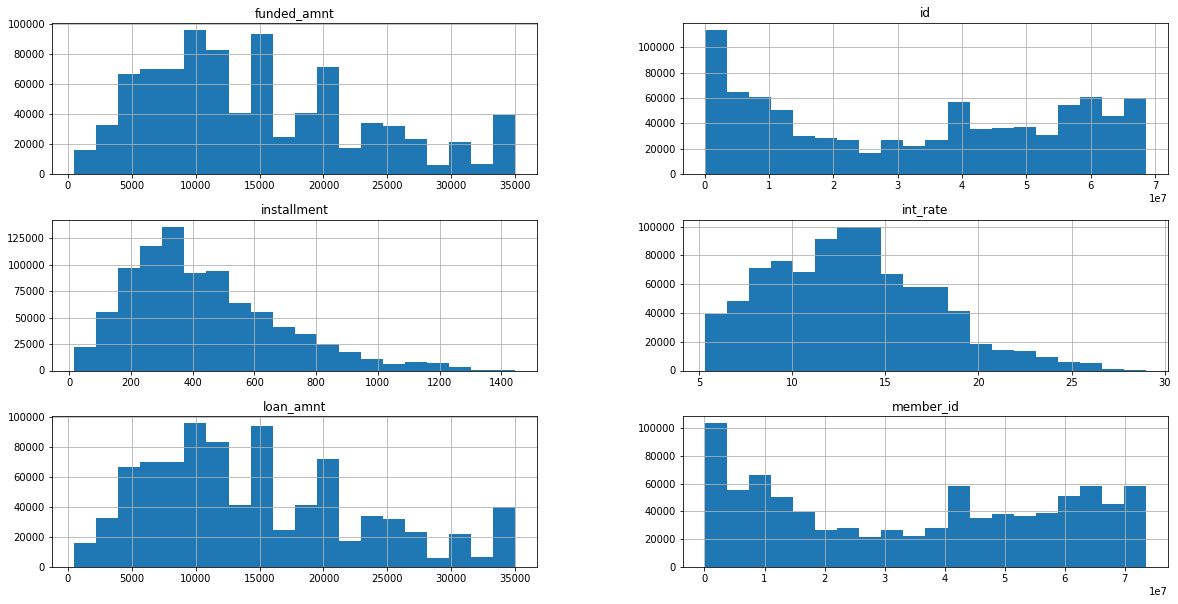

In [20]:
import matplotlib.pyplot as plt
LoanDF.hist(figsize=(20,10), bins=20) # bins為長條組數
plt.show()

## Correlation and heatmap

In [23]:
LoanDF.corr()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment
id,1.000000,0.999443,0.063803,0.066058,-0.142963,0.025347
member_id,0.999443,1.000000,0.064461,0.066754,-0.142205,0.026036
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.145023,0.944977
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.145160,0.946005
int_rate,-0.142963,-0.142205,0.145023,0.145160,1.000000,0.133075
installment,0.025347,0.026036,0.944977,0.946005,0.133075,1.000000


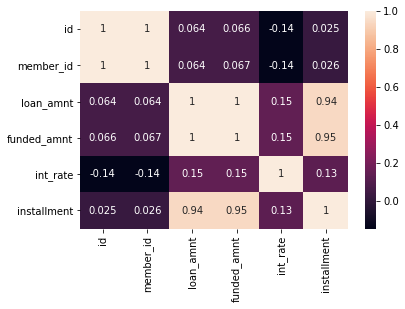

In [24]:
import seaborn as sns
loan_corr = LoanDF.corr()
sns.heatmap(loan_corr, xticklabels = loan_corr.columns, yticklabels = loan_corr.columns, annot=True)